## STYLE RECOMMENDATIONS ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


# 1.Load Data

In [2]:
# Load women's clothing reviews
df = pd.read_csv('ai/data/Womens Clothing E-Commerce Reviews.csv', low_memory=False)

print(f'Total Reviews: {len(df):,}')
print(f'Unique Products: {df["Clothing ID"].nunique()}')
print(f'\nDataset Shape: {df.shape}')
print(f'\nColumns: {list(df.columns)}')
print(f'\nFirst 3 rows:')
print(df.head(3))

Total Reviews: 23,486
Unique Products: 1206

Dataset Shape: (23486, 11)

Columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']

First 3 rows:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4    

# 2.Clean Data 

In [3]:
# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Convert numeric columns
numeric_cols = ['Rating', 'Recommended IND', 'Positive Feedback Count', 'Age']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with missing Clothing ID
df = df[df['Clothing ID'].notna()].copy()

print(f'Clean dataset shape: {df.shape}')
print(f'\nMissing values:\n{df.isnull().sum()}')
print(f'\nData types:\n{df.dtypes}')

Clean dataset shape: (23486, 11)

Missing values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Data types:
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


# 3.Analyse Clothing Classes

In [4]:
# Analyze classes
class_stats = df.groupby('Class Name').agg({
    'Clothing ID': 'count',
    'Rating': 'mean',
    'Recommended IND': 'mean'
}).round(3)
class_stats.columns = ['Review Count', 'Avg Rating', 'Recommendation Rate']
class_stats = class_stats.sort_values('Review Count', ascending=False)

print('Top 10 Clothing Classes:')
print('='*70)
print(class_stats.head(10))

Top 10 Clothing Classes:
            Review Count  Avg Rating  Recommendation Rate
Class Name                                               
Dresses             6319       4.151                0.808
Knits               4843       4.162                0.818
Blouses             3097       4.154                0.810
Sweaters            1428       4.179                0.800
Pants               1388       4.266                0.833
Jeans               1147       4.361                0.881
Fine gauge          1100       4.261                0.837
Skirts               945       4.246                0.846
Jackets              704       4.295                0.845
Lounge               691       4.301                0.860


# 4.Age Group Preferences #

In [5]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65, 100], 
                          labels=['18-25', '26-35', '36-50', '51-65', '65+'])

# Find preferred classes by age group
age_pref = df.groupby(['Age Group', 'Class Name']).size().reset_index(name='count')
age_pref = age_pref.sort_values(['Age Group', 'count'], ascending=[True, False])

# Top 3 classes per age group
print('Top 3 Preferred Classes by Age Group:')
print('='*70)
for age_group in ['18-25', '26-35', '36-50', '51-65', '65+']:
    top = age_pref[age_pref['Age Group'] == age_group].head(3)
    print(f'\n{age_group}:')
    for _, row in top.iterrows():
        print(f'  • {row["Class Name"]}: {int(row["count"])} reviews')

Top 3 Preferred Classes by Age Group:

18-25:
  • Dresses: 357 reviews
  • Knits: 233 reviews
  • Blouses: 145 reviews

26-35:
  • Dresses: 1737 reviews
  • Knits: 1160 reviews
  • Blouses: 673 reviews

36-50:
  • Dresses: 2733 reviews
  • Knits: 2067 reviews
  • Blouses: 1329 reviews

51-65:
  • Dresses: 1242 reviews
  • Knits: 1132 reviews
  • Blouses: 789 reviews

65+:
  • Knits: 251 reviews
  • Dresses: 250 reviews
  • Blouses: 161 reviews


# 5.Customer satisfaction

In [6]:
# Analyze satisfaction metrics
satisfaction = df.groupby('Class Name').agg({
    'Rating': ['mean', 'std', 'count'],
    'Recommended IND': lambda x: (x.sum() / len(x) * 100),
    'Positive Feedback Count': 'mean'
}).round(2)
satisfaction.columns = ['Avg Rating', 'Rating StdDev', 'Review Count', 'Recommendation %', 'Avg Positive Feedback']
satisfaction = satisfaction[satisfaction['Review Count'] >= 50].sort_values('Avg Rating', ascending=False)

print('Customer Satisfaction by Class (50+ reviews):')
print('='*70)
print(satisfaction.head(15))

Customer Satisfaction by Class (50+ reviews):
            Avg Rating  Rating StdDev  Review Count  Recommendation %  \
Class Name                                                              
Layering          4.38           0.97           146             88.36   
Jeans             4.36           1.02          1147             88.14   
Lounge            4.30           1.03           691             85.96   
Jackets           4.30           1.14           704             84.52   
Sleep             4.29           1.13           228             85.53   
Intimates         4.28           1.13           154             85.71   
Legwear           4.28           1.16           165             86.06   
Pants             4.27           1.07          1388             83.29   
Fine gauge        4.26           1.07          1100             83.73   
Shorts            4.26           1.06           317             83.91   
Skirts            4.25           1.08           945             84.55   
Swim 

# 6.Style Recommender class

In [7]:
class StyleRecommender:
    """Recommends clothing styles based on customer profile."""
    
    def __init__(self, df):
        self.df = df
        self.class_stats = self._compute_stats()
    
    def _compute_stats(self):
        """Compute class-level statistics."""
        stats = self.df.groupby('Class Name').agg({
            'Rating': 'mean',
            'Recommended IND': 'mean',
            'Positive Feedback Count': 'mean',
            'Clothing ID': 'count'
        }).rename(columns={'Clothing ID': 'review_count'})
        
        # Compute composite score (0-100)
        stats['score'] = (
            (stats['Rating'] / 5 * 0.4) +
            (stats['Recommended IND'] * 0.4) +
            (stats['Positive Feedback Count'] / stats['Positive Feedback Count'].max() * 0.2)
        ) * 100
        
        return stats.sort_values('score', ascending=False)
    
    def recommend_by_age(self, age: int, top_k: int = 5):
        """Recommend styles for a specific age."""
        age_group_df = self.df[(self.df['Age'] >= age - 5) & (self.df['Age'] <= age + 5)]
        
        preferred = age_group_df['Class Name'].value_counts().head(top_k)
        recommendations = []
        
        for cls in preferred.index:
            if cls in self.class_stats.index:
                stat = self.class_stats.loc[cls]
                recommendations.append({
                    'class': cls,
                    'popularity': preferred[cls],
                    'rating': round(stat['Rating'], 2),
                    'recommendation_rate': round(stat['Recommended IND'] * 100, 1),
                    'score': round(stat['score'], 1)
                })
        
        return recommendations
    
    def recommend_by_rating_preference(self, min_rating: float = 4.0, top_k: int = 5):
        """Recommend high-satisfaction styles."""
        filtered = self.class_stats[
            (self.class_stats['Rating'] >= min_rating) &
            (self.class_stats['review_count'] >= 50)
        ].head(top_k)
        
        recommendations = []
        for cls in filtered.index:
            stat = filtered.loc[cls]
            recommendations.append({
                'class': cls,
                'rating': round(stat['Rating'], 2),
                'recommendation_rate': round(stat['Recommended IND'] * 100, 1),
                'reviews': int(stat['review_count']),
                'score': round(stat['score'], 1)
            })
        
        return recommendations
    
    def recommend_trending(self, top_k: int = 5):
        """Recommend currently trending styles."""
        trending = self.class_stats.nlargest(top_k, 'review_count')
        
        recommendations = []
        for cls in trending.index:
            stat = trending.loc[cls]
            recommendations.append({
                'class': cls,
                'review_count': int(stat['review_count']),
                'rating': round(stat['Rating'], 2),
                'recommendation_rate': round(stat['Recommended IND'] * 100, 1),
                'score': round(stat['score'], 1)
            })
        
        return recommendations

# Initialize recommender
recommender = StyleRecommender(df)
print('✓ StyleRecommender class initialized')

✓ StyleRecommender class initialized


# Recommendations 

In [11]:
# Recommendations for age 28
print('📊 Recommendations for 28-year-old Women:')
print('='*70)
recs = recommender.recommend_by_age(28, top_k=5)
for i, rec in enumerate(recs, 1):
    print(f"\n{i}. {rec['class']}")
    print(f"   Rating: {rec['rating']}/5 | Recommendation Rate: {rec['recommendation_rate']}%")
    print(f"   Score: {rec['score']}/100")

📊 Recommendations for 28-year-old Women:

1. Dresses
   Rating: 4.15/5 | Recommendation Rate: 80.8%
   Score: 83.9/100

2. Knits
   Rating: 4.16/5 | Recommendation Rate: 81.8%
   Score: 80.2/100

3. Blouses
   Rating: 4.15/5 | Recommendation Rate: 81.0%
   Score: 81.8/100

4. Pants
   Rating: 4.27/5 | Recommendation Rate: 83.3%
   Score: 81.7/100

5. Sweaters
   Rating: 4.18/5 | Recommendation Rate: 80.0%
   Score: 78.6/100


# High Satisfaction styles

In [9]:
# High-satisfaction styles (4.0+ rating)
print('\n⭐ High Satisfaction Styles (Rating ≥ 4.0):')
print('='*70)
recs = recommender.recommend_by_rating_preference(min_rating=4.0, top_k=5)
for i, rec in enumerate(recs, 1):
    print(f"\n{i}. {rec['class']}")
    print(f"   Avg Rating: {rec['rating']}/5 | Recommended: {rec['recommendation_rate']}%")
    print(f"   Reviews: {rec['reviews']} | Score: {rec['score']}/100")


⭐ High Satisfaction Styles (Rating ≥ 4.0):

1. Jackets
   Avg Rating: 4.3/5 | Recommended: 84.5%
   Reviews: 704 | Score: 84.9/100

2. Dresses
   Avg Rating: 4.15/5 | Recommended: 80.8%
   Reviews: 6319 | Score: 83.9/100

3. Outerwear
   Avg Rating: 4.2/5 | Recommended: 81.7%
   Reviews: 328 | Score: 83.0/100

4. Lounge
   Avg Rating: 4.3/5 | Recommended: 86.0%
   Reviews: 691 | Score: 82.6/100

5. Blouses
   Avg Rating: 4.15/5 | Recommended: 81.0%
   Reviews: 3097 | Score: 81.8/100


Current Trending styles

In [10]:
# Currently trending styles
print('\n🔥 Currently Trending Styles:')
print('='*70)
recs = recommender.recommend_trending(top_k=5)
for i, rec in enumerate(recs, 1):
    print(f"\n{i}. {rec['class']}")
    print(f"   Reviews: {rec['review_count']} | Avg Rating: {rec['rating']}/5")
    print(f"   Recommendation Rate: {rec['recommendation_rate']}% | Score: {rec['score']}/100")


🔥 Currently Trending Styles:

1. Dresses
   Reviews: 6319 | Avg Rating: 4.15/5
   Recommendation Rate: 80.8% | Score: 83.9/100

2. Knits
   Reviews: 4843 | Avg Rating: 4.16/5
   Recommendation Rate: 81.8% | Score: 80.2/100

3. Blouses
   Reviews: 3097 | Avg Rating: 4.15/5
   Recommendation Rate: 81.0% | Score: 81.8/100

4. Sweaters
   Reviews: 1428 | Avg Rating: 4.18/5
   Recommendation Rate: 80.0% | Score: 78.6/100

5. Pants
   Reviews: 1388 | Avg Rating: 4.27/5
   Recommendation Rate: 83.3% | Score: 81.7/100


# 7.Visualisations
# Heatmap

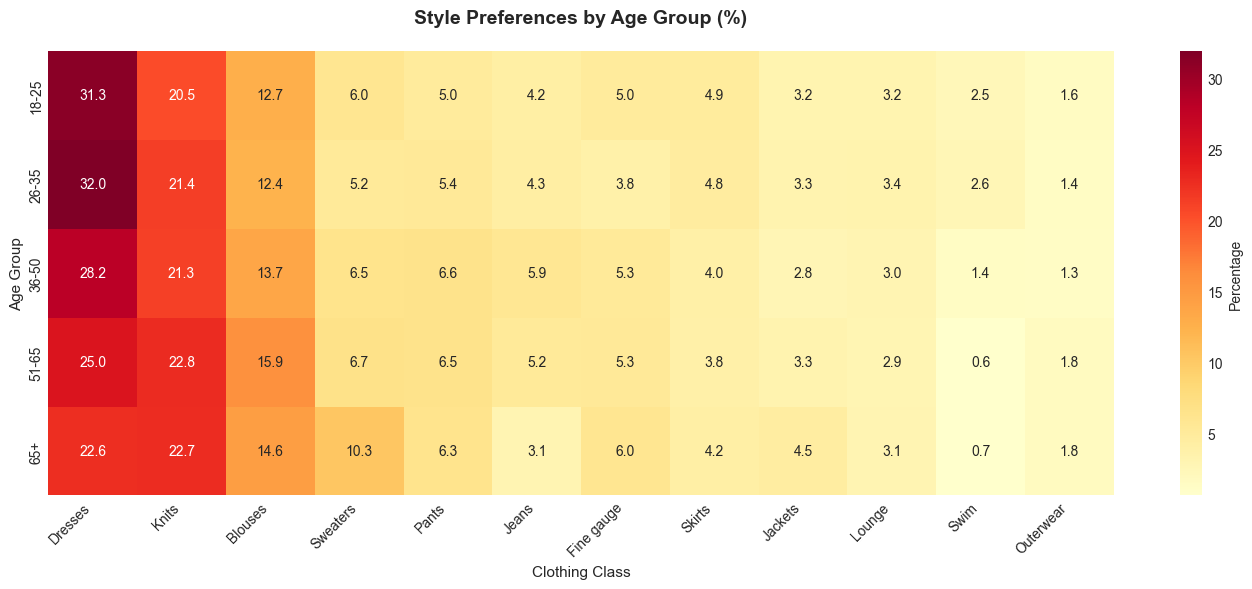


✓ Heatmap saved to ai/data/age_style_heatmap.png


In [12]:
# Create age group vs style heatmap
age_style_matrix = pd.crosstab(
    df['Age Group'],
    df['Class Name']
)

# Select top 12 classes
top_classes = df['Class Name'].value_counts().head(12).index
age_style_filtered = age_style_matrix[top_classes]

# Normalize for better visualization
age_style_norm = age_style_filtered.div(age_style_filtered.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 6))
sns.heatmap(age_style_norm, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})
plt.title('Style Preferences by Age Group (%)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Clothing Class', fontsize=11)
plt.ylabel('Age Group', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('ai/data/age_style_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n✓ Heatmap saved to ai/data/age_style_heatmap.png')

# Review Count

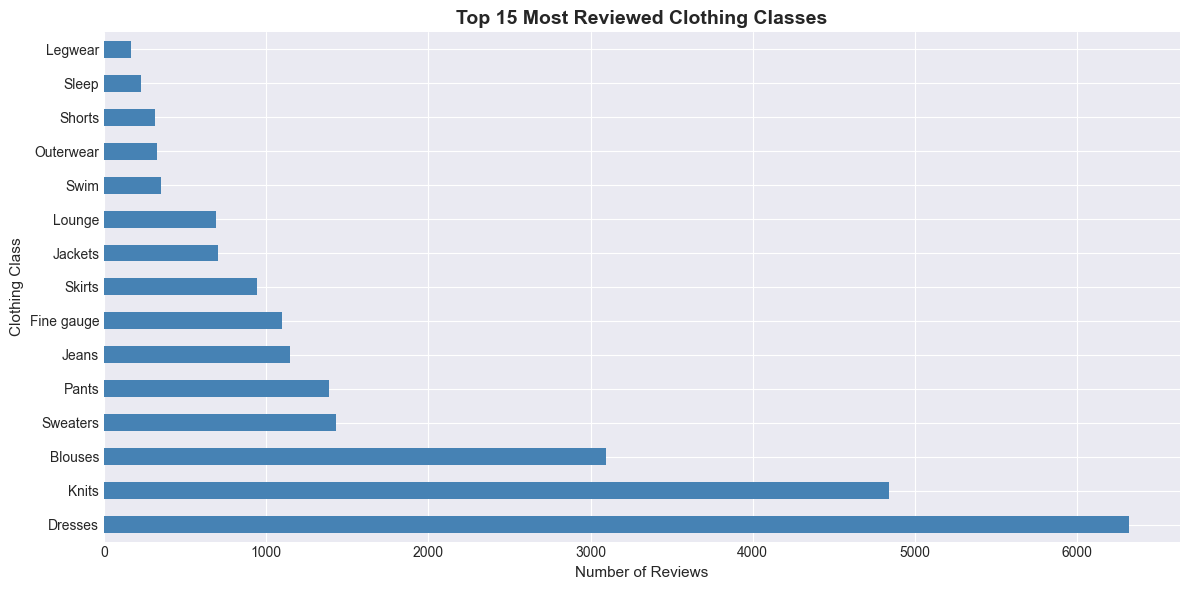

✓ Top classes chart saved


In [14]:
# Visualize top 15 classes by review count
fig, ax = plt.subplots(figsize=(12, 6))
top_15_classes = df['Class Name'].value_counts().head(15)
top_15_classes.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Top 15 Most Reviewed Clothing Classes', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Reviews', fontsize=11)
ax.set_ylabel('Clothing Class', fontsize=11)
plt.tight_layout()
plt.savefig('ai/data/top_classes_reviews.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Top classes chart saved')

# Rating Distribution

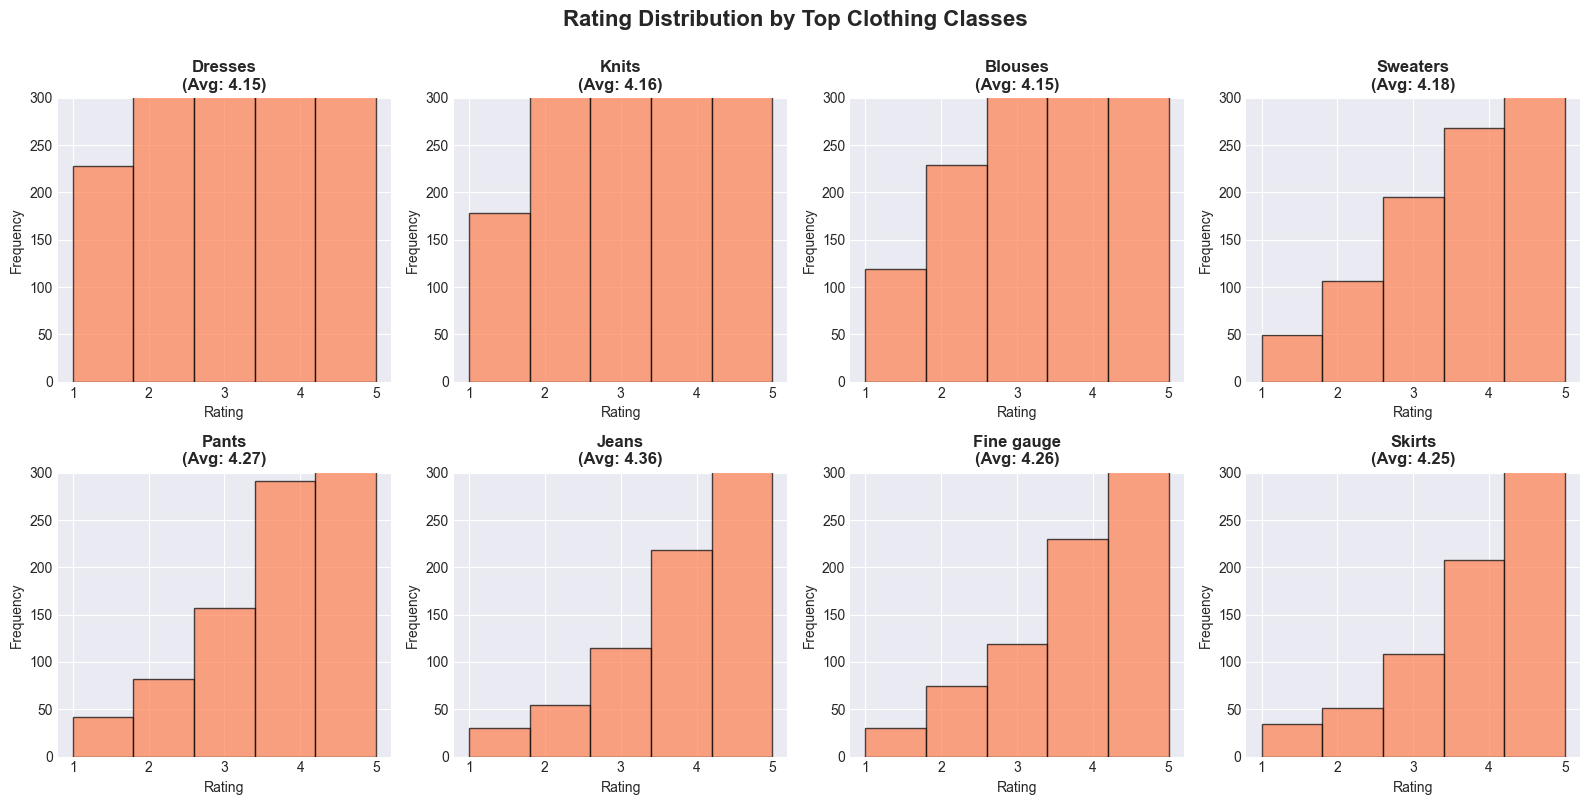

✓ Rating distribution chart saved


In [15]:
# Rating distribution for top 8 classes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
top_8_classes = df['Class Name'].value_counts().head(8).index

for idx, class_name in enumerate(top_8_classes):
    class_data = df[df['Class Name'] == class_name]['Rating']
    axes[idx].hist(class_data, bins=5, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{class_name}\n(Avg: {class_data.mean():.2f})', fontweight='bold')
    axes[idx].set_xlabel('Rating')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_ylim(0, 300)

plt.suptitle('Rating Distribution by Top Clothing Classes', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('ai/data/rating_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Rating distribution chart saved')

# Recommendation rate for top 12 classes

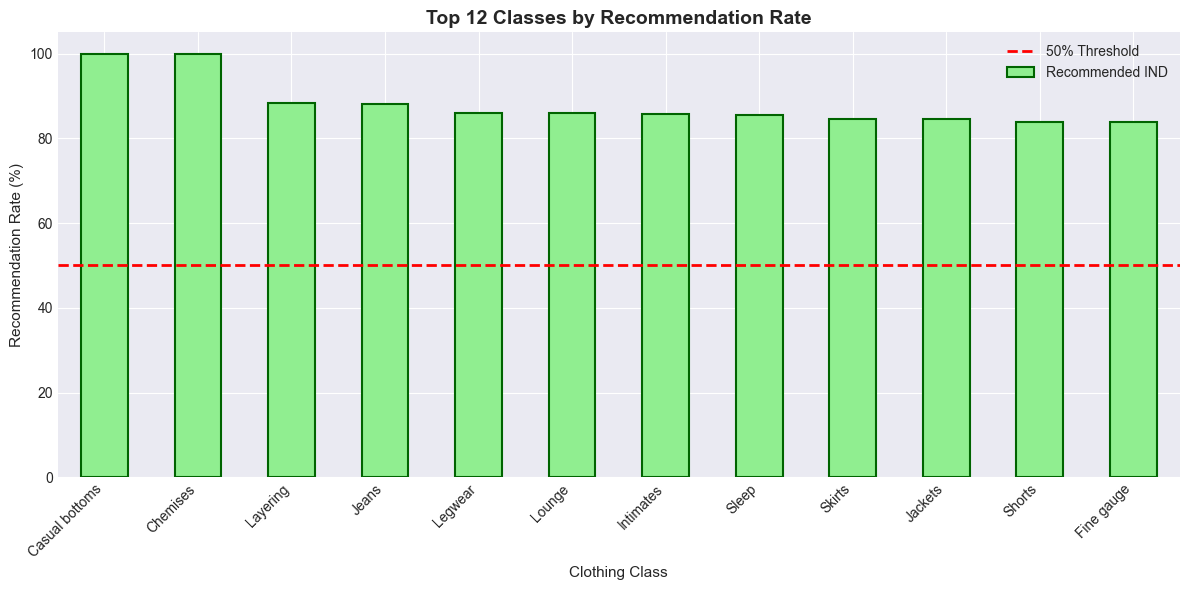

✓ Recommendation rate chart saved


In [16]:
# Recommendation rate for top 12 classes
fig, ax = plt.subplots(figsize=(12, 6))
top_classes_rec = df.groupby('Class Name')['Recommended IND'].agg(lambda x: (x.sum() / len(x) * 100)).nlargest(12)
top_classes_rec.plot(kind='bar', ax=ax, color='lightgreen', edgecolor='darkgreen', linewidth=1.5)
ax.set_title('Top 12 Classes by Recommendation Rate', fontsize=14, fontweight='bold')
ax.set_ylabel('Recommendation Rate (%)', fontsize=11)
ax.set_xlabel('Clothing Class', fontsize=11)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% Threshold')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('ai/data/recommendation_rate.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Recommendation rate chart saved')

# Age distributions

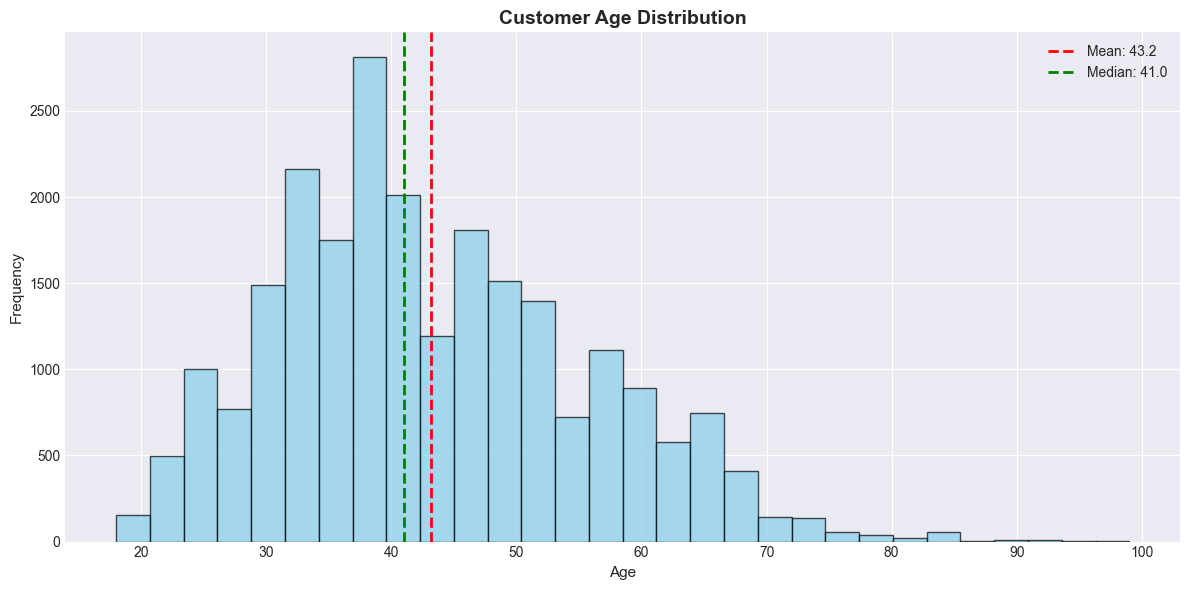

✓ Age distribution chart saved


In [17]:
# Age distribution with histogram and KDE
fig, ax = plt.subplots(figsize=(12, 6))
df['Age'].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
ax.set_title('Customer Age Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Age', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
ax.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
ax.legend()
plt.tight_layout()
plt.savefig('ai/data/age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Age distribution chart saved')

# Average positive feedback by top classes

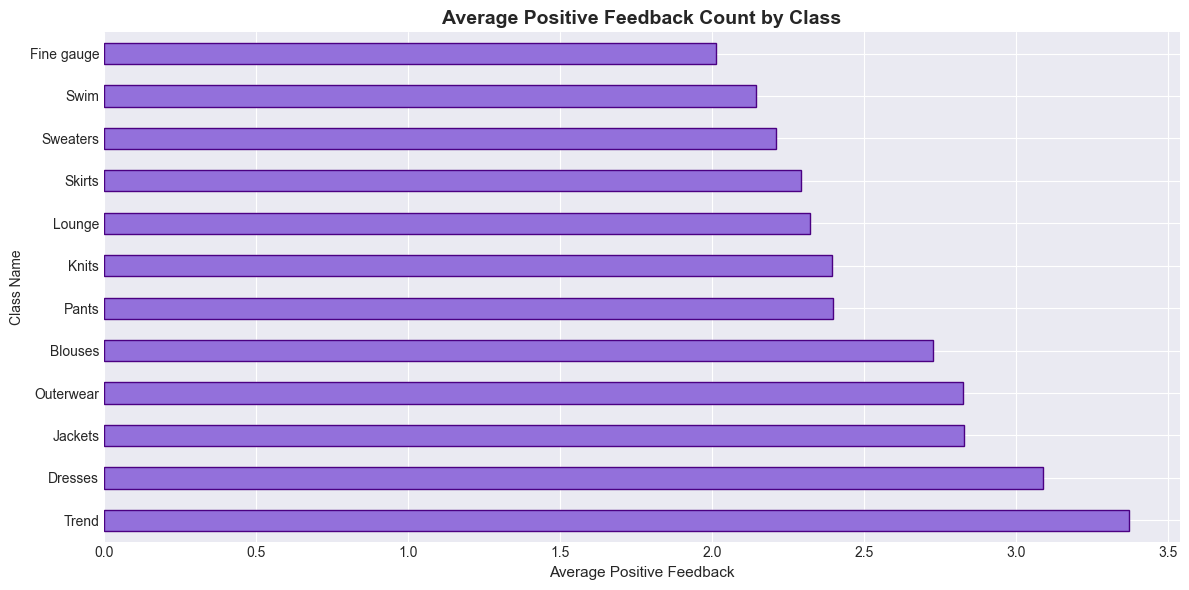

✓ Positive feedback chart saved


In [18]:
# Average positive feedback by top classes
fig, ax = plt.subplots(figsize=(12, 6))
top_feedback = df.groupby('Class Name')['Positive Feedback Count'].mean().nlargest(12)
top_feedback.plot(kind='barh', ax=ax, color='mediumpurple', edgecolor='indigo')
ax.set_title('Average Positive Feedback Count by Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Positive Feedback', fontsize=11)
plt.tight_layout()
plt.savefig('ai/data/positive_feedback.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Positive feedback chart saved')

# Scatter Plot 

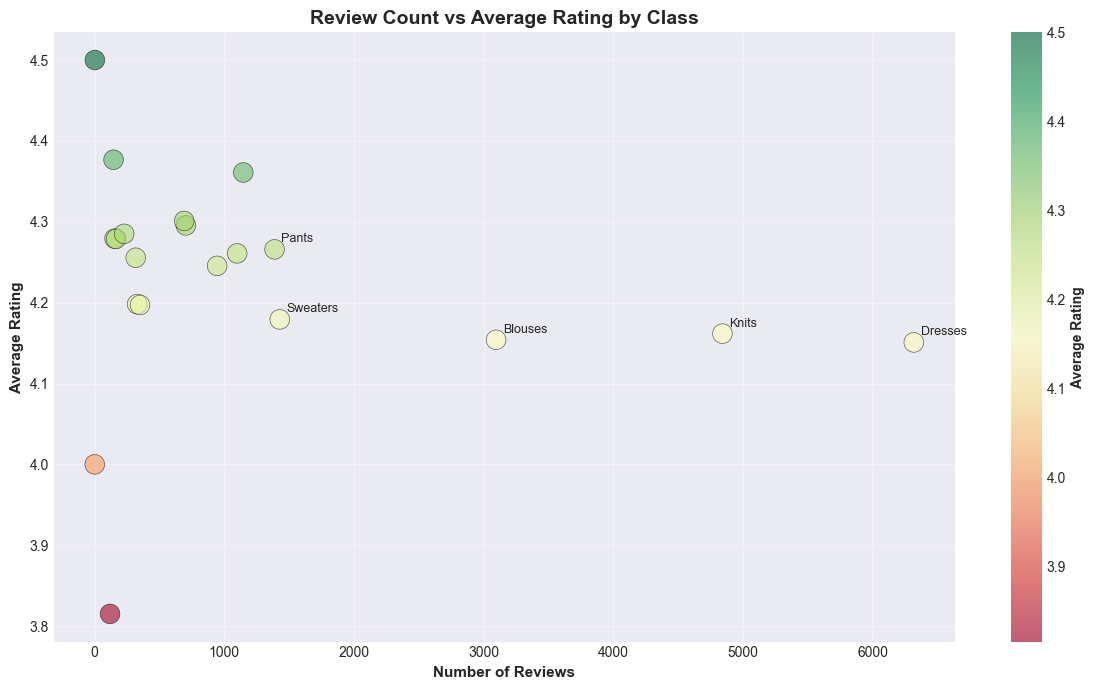

✓ Review count vs rating scatter plot saved


In [19]:
# Scatter plot: Review count vs Average rating by department
fig, ax = plt.subplots(figsize=(12, 7))
dept_stats = df.groupby('Class Name').agg({
    'Clothing ID': 'count',
    'Rating': 'mean'
}).rename(columns={'Clothing ID': 'Review Count'})

scatter = ax.scatter(dept_stats['Review Count'], dept_stats['Rating'], 
                     s=200, alpha=0.6, c=dept_stats['Rating'], 
                     cmap='RdYlGn', edgecolor='black', linewidth=0.5)

ax.set_xlabel('Number of Reviews', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Rating', fontsize=11, fontweight='bold')
ax.set_title('Review Count vs Average Rating by Class', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Rating', fontweight='bold')

# Annotate top 5
top_5 = dept_stats.nlargest(5, 'Review Count')
for idx, row in top_5.iterrows():
    ax.annotate(idx, (row['Review Count'], row['Rating']), 
                fontsize=9, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('ai/data/review_vs_rating.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Review count vs rating scatter plot saved')

# Division performance

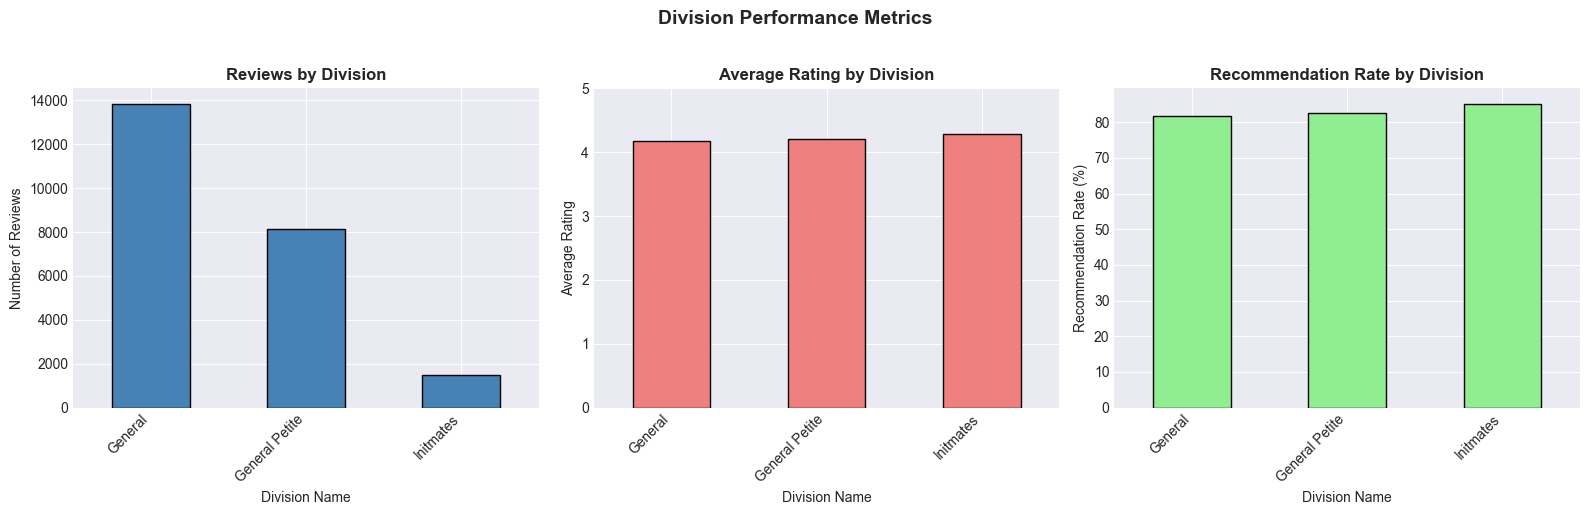

✓ Division performance comparison saved


In [20]:
# Division performance - multi-metric comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

division_stats = df.groupby('Division Name').agg({
    'Clothing ID': 'count',
    'Rating': 'mean',
    'Recommended IND': lambda x: (x.sum() / len(x) * 100)
}).rename(columns={'Clothing ID': 'Review Count'})

# Plot 1: Review count by division
division_stats['Review Count'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Reviews by Division', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Reviews', fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Average rating by division
division_stats['Rating'].plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Average Rating by Division', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Rating', fontsize=10)
axes[1].set_ylim(0, 5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Recommendation rate by division
division_stats['Recommended IND'].plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Recommendation Rate by Division', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Recommendation Rate (%)', fontsize=10)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Division Performance Metrics', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('ai/data/division_performance.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Division performance comparison saved')

# Bubble chart

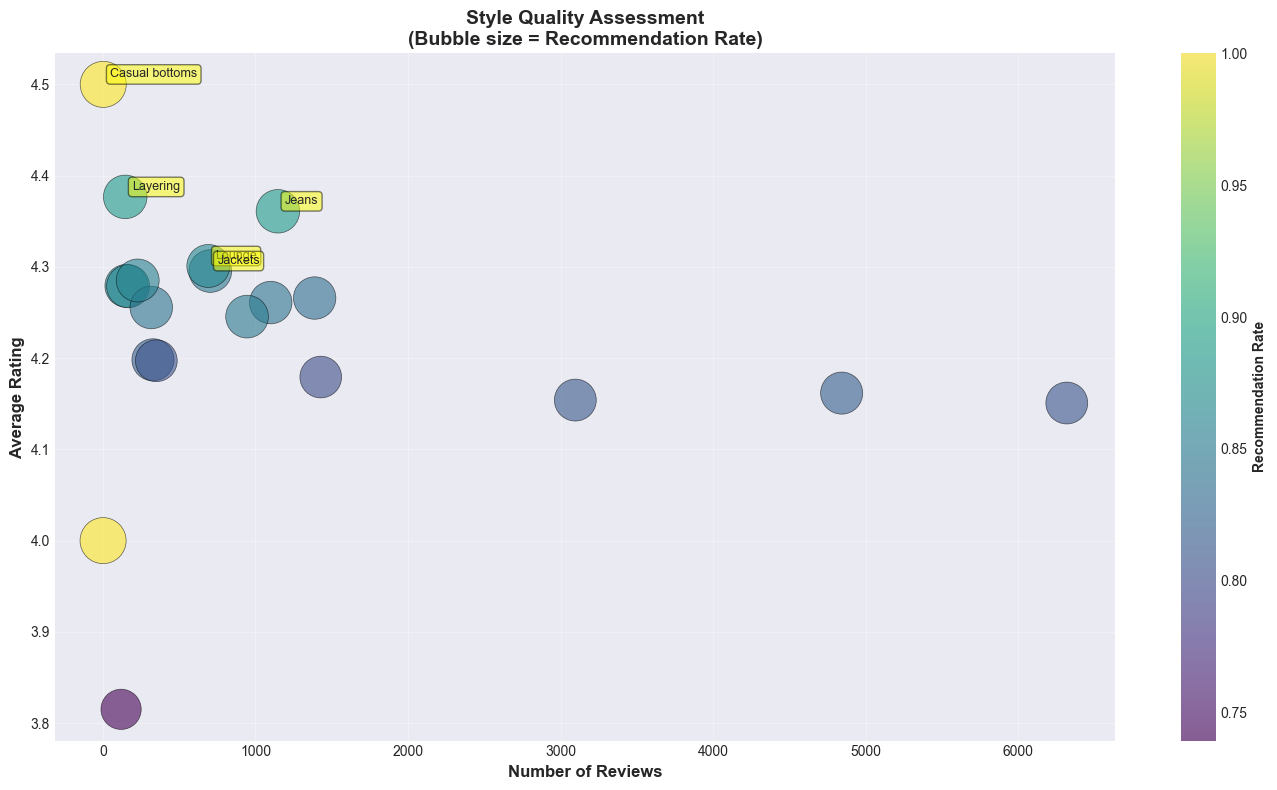

✓ Quality assessment bubble chart saved


In [21]:
# Bubble chart: Review count vs Rating, sized by recommendation rate
fig, ax = plt.subplots(figsize=(14, 8))

class_analysis = df.groupby('Class Name').agg({
    'Clothing ID': 'count',
    'Rating': 'mean',
    'Recommended IND': 'mean'
}).rename(columns={'Clothing ID': 'Review Count'})

# Size represents recommendation rate (scale to 0-1000 for visibility)
bubble_sizes = (class_analysis['Recommended IND'] * 1000) + 100

scatter = ax.scatter(class_analysis['Review Count'], 
                     class_analysis['Rating'],
                     s=bubble_sizes,
                     c=class_analysis['Recommended IND'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolor='black',
                     linewidth=0.5)

ax.set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax.set_title('Style Quality Assessment\n(Bubble size = Recommendation Rate)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Recommendation Rate', fontweight='bold')

# Annotate top performers
top_performers = class_analysis.nlargest(5, 'Rating')
for idx, row in top_performers.iterrows():
    ax.annotate(idx, (row['Review Count'], row['Rating']), 
                fontsize=9, xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('ai/data/quality_assessment.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Quality assessment bubble chart saved')

# Box plot

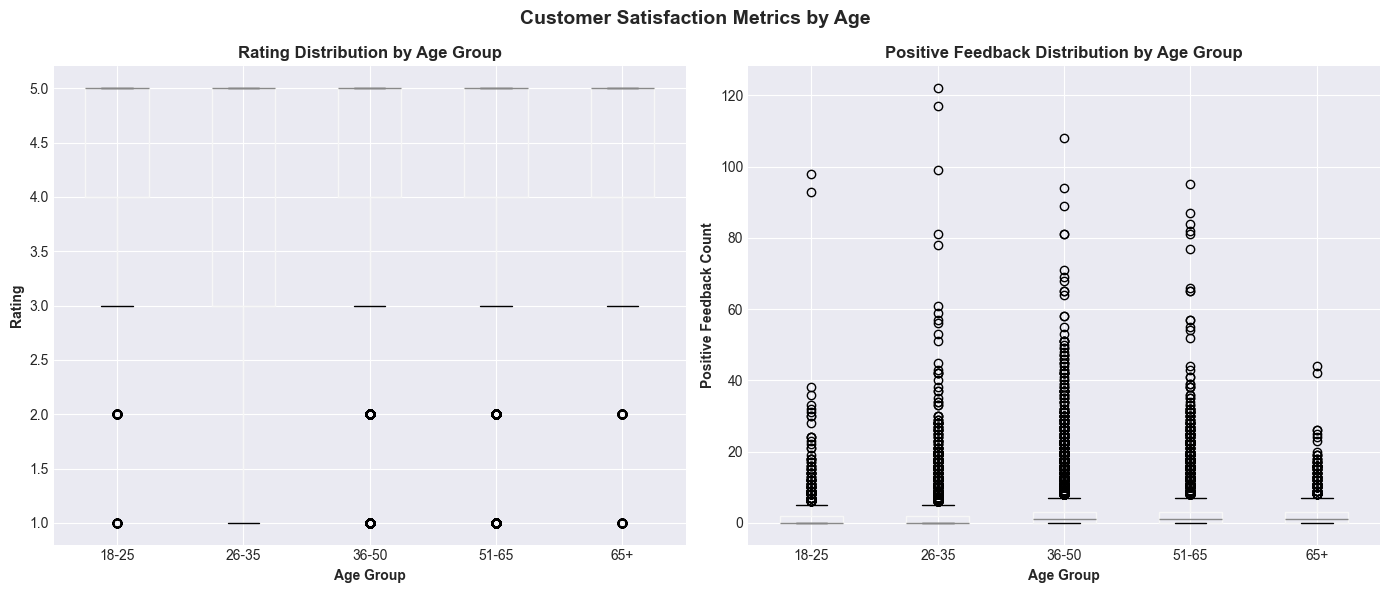

✓ Age group patterns chart saved


In [22]:
# Box plot: Rating distribution by age group
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot 1: Rating by age group
df.boxplot(column='Rating', by='Age Group', ax=axes[0])
axes[0].set_title('Rating Distribution by Age Group', fontweight='bold')
axes[0].set_xlabel('Age Group', fontweight='bold')
axes[0].set_ylabel('Rating', fontweight='bold')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Box plot 2: Positive feedback by age group
df.boxplot(column='Positive Feedback Count', by='Age Group', ax=axes[1])
axes[1].set_title('Positive Feedback Distribution by Age Group', fontweight='bold')
axes[1].set_xlabel('Age Group', fontweight='bold')
axes[1].set_ylabel('Positive Feedback Count', fontweight='bold')
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.suptitle('Customer Satisfaction Metrics by Age', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('ai/data/age_group_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Age group patterns chart saved')

# Dashboard

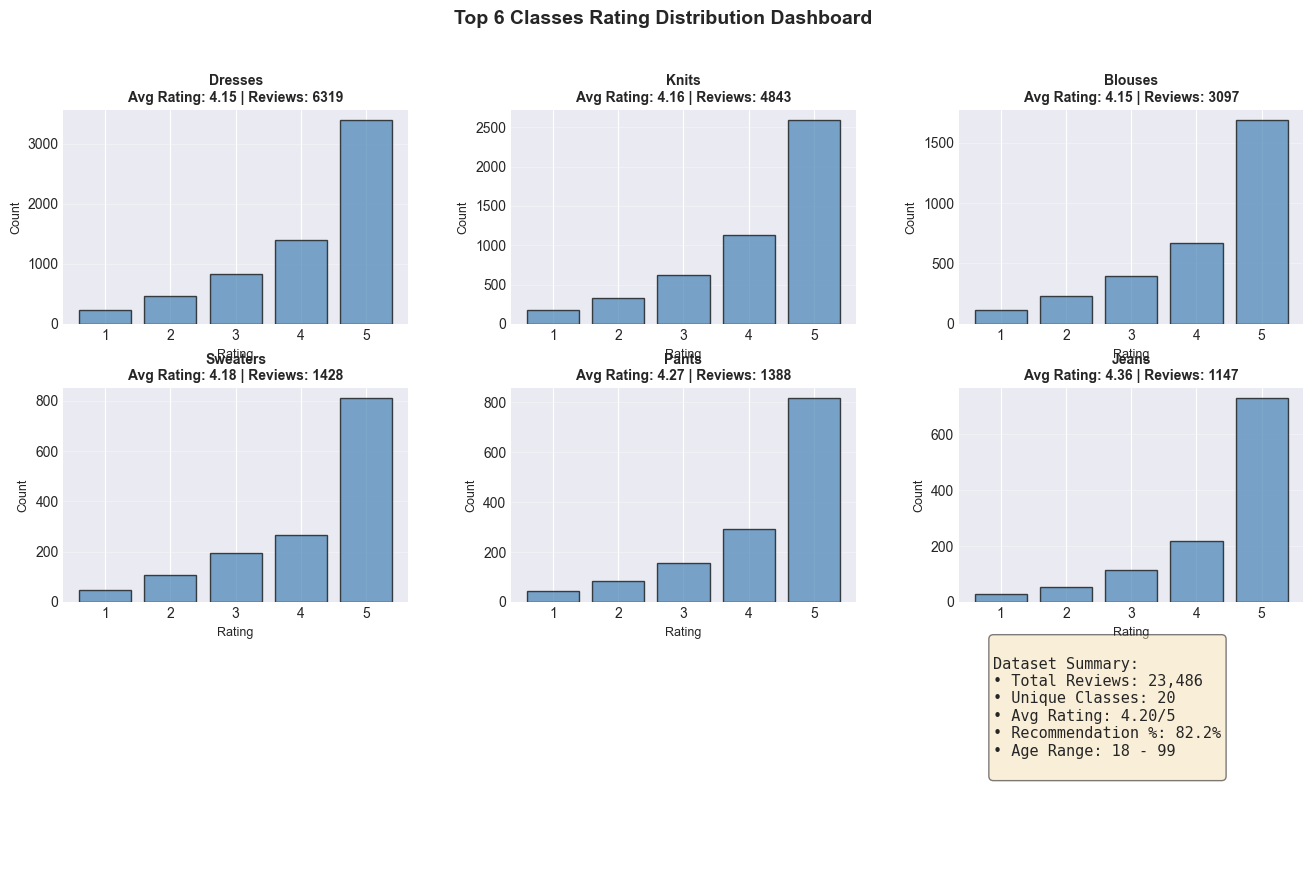

✓ Top classes dashboard saved


In [23]:
# Create a comprehensive dashboard for top 6 classes
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

top_6 = df['Class Name'].value_counts().head(6).index

for idx, class_name in enumerate(top_6):
    ax = fig.add_subplot(gs[idx // 3, idx % 3])
    
    class_data = df[df['Class Name'] == class_name]
    rating_counts = class_data['Rating'].value_counts().sort_index()
    
    ax.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{class_name}\nAvg Rating: {class_data["Rating"].mean():.2f} | Reviews: {len(class_data)}', 
                 fontweight='bold', fontsize=10)
    ax.set_xlabel('Rating', fontsize=9)
    ax.set_ylabel('Count', fontsize=9)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.grid(True, alpha=0.3, axis='y')

# Use remaining subplot for summary text
ax_summary = fig.add_subplot(gs[2, 2])
ax_summary.axis('off')
summary_text = f"""
Dataset Summary:
• Total Reviews: {len(df):,}
• Unique Classes: {df['Class Name'].nunique()}
• Avg Rating: {df['Rating'].mean():.2f}/5
• Recommendation %: {(df['Recommended IND'].sum() / len(df) * 100):.1f}%
• Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f}
"""
ax_summary.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Top 6 Classes Rating Distribution Dashboard', fontsize=14, fontweight='bold')
plt.savefig('ai/data/top_classes_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print('✓ Top classes dashboard saved')

# Summary

In [24]:
# Create a comprehensive summary statistics table
print('\n\n' + '='*100)
print('COMPREHENSIVE DATASET STATISTICS')
print('='*100)

summary_stats = {
    'Metric': [
        'Total Reviews',
        'Unique Products',
        'Unique Classes',
        'Unique Divisions',
        'Average Rating',
        'Average Age',
        'Recommendation Rate',
        'Avg Positive Feedback',
        'Min Age',
        'Max Age'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['Clothing ID'].nunique():,}",
        f"{df['Class Name'].nunique()}",
        f"{df['Division Name'].nunique()}",
        f"{df['Rating'].mean():.2f} / 5",
        f"{df['Age'].mean():.1f} years",
        f"{(df['Recommended IND'].sum() / len(df) * 100):.1f}%",
        f"{df['Positive Feedback Count'].mean():.2f}",
        f"{df['Age'].min():.0f} years",
        f"{df['Age'].max():.0f} years"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))
print('='*100)

# Class performance table
print('\n\nTOP 10 CLASSES - DETAILED PERFORMANCE METRICS')
print('='*100)
class_performance = df.groupby('Class Name').agg({
    'Clothing ID': 'count',
    'Rating': 'mean',
    'Recommended IND': lambda x: (x.sum() / len(x) * 100),
    'Positive Feedback Count': 'mean'
}).round(2)
class_performance.columns = ['Reviews', 'Avg Rating', 'Rec Rate %', 'Avg Feedback']
class_performance = class_performance.sort_values('Reviews', ascending=False).head(10)
print(class_performance.to_string())
print('='*100)



COMPREHENSIVE DATASET STATISTICS
               Metric      Value
        Total Reviews     23,486
      Unique Products      1,206
       Unique Classes         20
     Unique Divisions          3
       Average Rating   4.20 / 5
          Average Age 43.2 years
  Recommendation Rate      82.2%
Avg Positive Feedback       2.54
              Min Age   18 years
              Max Age   99 years


TOP 10 CLASSES - DETAILED PERFORMANCE METRICS
            Reviews  Avg Rating  Rec Rate %  Avg Feedback
Class Name                                               
Dresses        6319        4.15       80.82          3.09
Knits          4843        4.16       81.77          2.39
Blouses        3097        4.15       81.01          2.73
Sweaters       1428        4.18       80.04          2.21
Pants          1388        4.27       83.29          2.40
Jeans          1147        4.36       88.14          1.76
Fine gauge     1100        4.26       83.73          2.01
Skirts          945        4.25 

# 8. Key insights

In [13]:
# Generate key insights
print('\n\n📈 KEY INSIGHTS & STRATEGIC RECOMMENDATIONS:')
print('='*70)

# Insight 1
top_style = df['Class Name'].value_counts().idxmax()
top_count = df['Class Name'].value_counts().max()
print(f"\n1. {top_style} is most reviewed style with {top_count:,} reviews")

# Insight 2
high_rated = recommender.class_stats[recommender.class_stats['review_count'] >= 50]['Rating'].max()
high_rated_style = recommender.class_stats[recommender.class_stats['review_count'] >= 50]['Rating'].idxmax()
print(f"2. {high_rated_style} has highest satisfaction (Rating: {high_rated:.2f}/5)")

# Insight 3
best_rec = recommender.class_stats[recommender.class_stats['review_count'] >= 50]['Recommended IND'].max()
best_rec_style = recommender.class_stats[recommender.class_stats['review_count'] >= 50]['Recommended IND'].idxmax()
print(f"3. {best_rec_style} has highest recommendation rate ({best_rec*100:.1f}%)")

# Insight 4
age_25_recs = recommender.recommend_by_age(25, top_k=1)[0]['class']
age_45_recs = recommender.recommend_by_age(45, top_k=1)[0]['class']
print(f"4. Younger customers (25) prefer {age_25_recs}, Older (45) prefer {age_45_recs}")

# Insight 5
consistency = recommender.class_stats[recommender.class_stats['review_count'] >= 50].nlargest(1, 'score')
consistent_style = consistency.index[0]
consistent_score = consistency['score'].values[0]
print(f"5. {consistent_style} is most consistent choice (Score: {consistent_score:.1f}/100)")

print('\n' + '='*70)
print('✅ Analysis Complete! Use these insights for collection creation.')



📈 KEY INSIGHTS & STRATEGIC RECOMMENDATIONS:

1. Dresses is most reviewed style with 6,319 reviews
2. Layering has highest satisfaction (Rating: 4.38/5)
3. Layering has highest recommendation rate (88.4%)
4. Younger customers (25) prefer Dresses, Older (45) prefer Dresses
5. Jackets is most consistent choice (Score: 84.9/100)

✅ Analysis Complete! Use these insights for collection creation.
